In [49]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns 
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import nltk

from nltk.stem import WordNetLemmatizer 


In [50]:
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, articles):
        return [self.wnl.lemmatize(t) for t in word_tokenize(articles)]

In [51]:
with open('Leslie_all.pickle','rb') as read_file:
    leslie_episodes = pickle.load(read_file)

leslie_episodes.head()

,Character,Episode,Episode_Split,Episode_Text
0,Leslie Knope,s1e01,s1e01,"Hello. Hi. My name is Leslie Knope, and I work..."
1,Leslie Knope,s1e02,s1e02,"Well, one of the funner things that we do here..."
2,Leslie Knope,s1e03,s1e03,The Parks Department has so many programs. Jer...
3,Leslie Knope,s1e04,s1e04,"I don't believe it. Oh, my God. It's real. Hey..."
4,Leslie Knope,s1e05,s1e05,"In a town as old as Pawnee, there's a lot of h..."


In [52]:
all_leslie_text = leslie_episodes['Episode_Text']
comb = all_leslie_text.str.cat(sep = ' ')
comb[:1000]

'Hello. Hi. My name is Leslie Knope, and I work for the Parks and Recreation Department. Can I ask you a few questions? Would you say that you are, "Enjoying yourself and having fun, having a moderate amount of fun and somewhat enjoying yourself, or having no fun and no enjoyment?" I\'m gonna put a lot of fun. Sir, this is a children\'s slide. You\'re not allowed to sleep in here. You know, when I first tell people that I work in the government, they say, "Oh." "The government." "The government stinks." "The lines are too long at the DMV." But now things have changed. People need our help. And it feels good to be needed. Could you put your arms to your side? And that might help you slide down a little easier. Do you want to come this way? Okay, we\'re gonna need you to get out. Get out of the slide. Okay? Here we go! Okay, wake up. Here we go. Out of the slide. You know, government isn\'t just a boys\' club anymore. Women are everywhere. It\'s a great time to be a woman in politics. Hi

In [53]:
doc = nlp(comb)

words_lemma = (" ".join(token.lemma_ for token in doc))
words_lemma[:10]

'hello . hi'

In [54]:
words_lemma[:1000]

'hello . hi . my name be Leslie Knope , and I work for the Parks and Recreation Department . can I ask you a few question ? would you say that you be , " enjoy yourself and have fun , have a moderate amount of fun and somewhat enjoy yourself , or have no fun and no enjoyment ? " I be gon na put a lot of fun . Sir , this be a child \'s slide . you be not allow to sleep in here . you know , when I first tell people that I work in the government , they say , " oh . " " the government . " " the government stink . " " the line be too long at the DMV . " but now thing have change . People need our help . and it feel good to be need . could you put your arm to your side ? and that might help you slide down a little easy . do you want to come this way ? okay , we be gon na need you to get out . get out of the slide . okay ? here we go ! okay , wake up . here we go . out of the slide . you know , government be n\'t just a boy \' club anymore . woman be everywhere . it be a great time to be a wo

In [55]:
import re
word_lower = re.sub(r'[^\w\s]','',words_lemma).lower()
word_lower[:1000]

'hello  hi  my name be leslie knope  and i work for the parks and recreation department  can i ask you a few question  would you say that you be   enjoy yourself and have fun  have a moderate amount of fun and somewhat enjoy yourself  or have no fun and no enjoyment   i be gon na put a lot of fun  sir  this be a child s slide  you be not allow to sleep in here  you know  when i first tell people that i work in the government  they say   oh    the government    the government stink    the line be too long at the dmv   but now thing have change  people need our help  and it feel good to be need  could you put your arm to your side  and that might help you slide down a little easy  do you want to come this way  okay  we be gon na need you to get out  get out of the slide  okay  here we go  okay  wake up  here we go  out of the slide  you know  government be nt just a boy  club anymore  woman be everywhere  it be a great time to be a woman in politic  hillary clinton  sarah palin  i  nancy

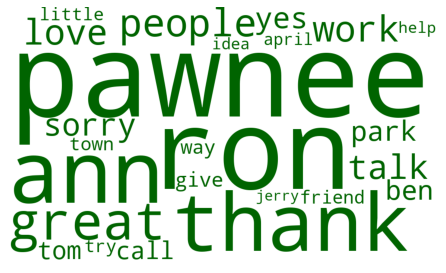

In [121]:
commonwords = ['okay', 'im', 'know', 'well', 'dont', 'youre', 'gonna', 'need', 'oh', 'one', 'think',
              'thats', 'want', 'go', 'yeah', 'going', 'let', 'will', 'now', 'hey', 'really', 'right',
              'look', 'god', 'say', 'hes', 'come', 'god', 'say', 'guy', 'much', 'thing', 'mean',
              'cant', 'theres', 'got', 'guys', 'put', 'ill', 'new', 'maybe', 'make', 'ive', 'theyre',
              'lets', 'take', 'something', 'back', 'see', 'tell', 'said', 'made', 'lot', 'shes', 
              'things', 'two', 'whats', 'day', 'even', 'didnt', 'first', 'every', 'leslie', 'knope',
              'keep', 'wait', 'wanted', 'time', 'nt', 's', 'gon', 'na', 've', 'll', 'good', 'ca']
,
stop_words = list(STOPWORDS)
stopwords = set(stop_words + commonwords)

wc = WordCloud(background_color="white",
               width=1000, height=600,
                    max_words=25,
                    prefer_horizontal=1.0,
                    stopwords=stopwords,
                    relative_scaling=1,
                    color_func=lambda *args, **kwargs: (0,100,0))

wc.generate(word_lower)

plt.figure(figsize = (6, 10), facecolor = None) 
plt.imshow(wc)
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
wc.to_file("wordcloud.png");

In [120]:
wc.words_

{'pawnee': 1.0,
 'ron': 0.9548192771084337,
 'ann': 0.9337349397590361,
 'thank': 0.858433734939759,
 'great': 0.8403614457831325,
 'people': 0.8072289156626506,
 'work': 0.7560240963855421,
 'love': 0.7439759036144579,
 'talk': 0.7078313253012049,
 'sorry': 0.6807228915662651,
 'yes': 0.6445783132530121,
 'park': 0.6054216867469879,
 'ben': 0.5873493975903614,
 'tom': 0.5391566265060241,
 'call': 0.5331325301204819,
 'give': 0.5,
 'way': 0.4759036144578313,
 'town': 0.45180722891566266,
 'friend': 0.4367469879518072,
 'try': 0.42771084337349397,
 'little': 0.4246987951807229,
 'april': 0.4246987951807229,
 'idea': 0.40963855421686746,
 'help': 0.4006024096385542,
 'jerry': 0.4006024096385542}

In [39]:
import pandas as pd
import pickle
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from corextopic import corextopic as ct
from corextopic import vis_topic as vt
from wordcloud import STOPWORDS

In [45]:
vectorizer = CountVectorizer(max_features=200000,
                             stop_words=stopwords, token_pattern="\\b[a-z][a-z]+\\b",
                             binary=True)

doc_word = vectorizer.fit_transform(words)
words = list(np.asarray(vectorizer.get_feature_names()))

In [46]:
topic_model = ct.Corex(n_hidden=2, words=words,
                       max_iter=200, verbose=False, seed=1)

topic_model.fit(doc_word, words=words, docs=leslie_episodes.Episode_Text, 
                anchors=[['parks'],
                        ['work']]
                         , anchor_strength=2)

# Print all topics from the CorEx topic model
topics = topic_model.get_topics()
for n,topic in enumerate(topics):
    topic_words,_ = zip(*topic)
    print('{}: '.format(n) + ','.join(topic_words))

0: parks,pinch,pillner,pile,pig,piece,pickle,photographer,phoebe,phenomenon
1: work,aah,prejudice,pregnant,pre,praise,practically,powerful,pour,potential
